CHARGER ET EXPLORER LES DONNEES 

In [2]:
# importer les bibliothéques principales 

# Importer les bibliothèques principales
import pandas as pd
import numpy as np

# Charger les données
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

# Afficher les 5 premières lignes
print(df.head())


   Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                    Hire_Date  Years_At_Company Education_Level  \
0  2022-01-19 08:03:05.556036                 2     High School   
1  2024-04-18 08:03:05.556036                 0     High School   
2  2015-10-26 08:03:05.556036                 8     High School   
3  2016-10-22 08:03:05.556036                 7        Bachelor   
4  2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34               

In [3]:
# Résumé des informations sur le dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [4]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


In [5]:
# Statistiques descriptives (pour variables numériques et catégorielles)
print(df.describe(include='all'))

          Employee_ID Department  Gender            Age   Job_Title  \
count   100000.000000     100000  100000  100000.000000      100000   
unique            NaN          9       3            NaN           7   
top               NaN  Marketing    Male            NaN  Specialist   
freq              NaN      11216   48031            NaN       14507   
mean     50000.500000        NaN     NaN      41.029410         NaN   
std      28867.657797        NaN     NaN      11.244121         NaN   
min          1.000000        NaN     NaN      22.000000         NaN   
25%      25000.750000        NaN     NaN      31.000000         NaN   
50%      50000.500000        NaN     NaN      41.000000         NaN   
75%      75000.250000        NaN     NaN      51.000000         NaN   
max     100000.000000        NaN     NaN      60.000000         NaN   

                         Hire_Date  Years_At_Company Education_Level  \
count                       100000     100000.000000          100000   
uni

test de normalité
avant tout test statistique pour pouvoir  

🔍 VISUALISATION DE LA NORMALITÉ PAR DÉPARTEMENT
📊 Nombre de départements à analyser : 9
📊 Organisation : 3 lignes × 3 colonnes


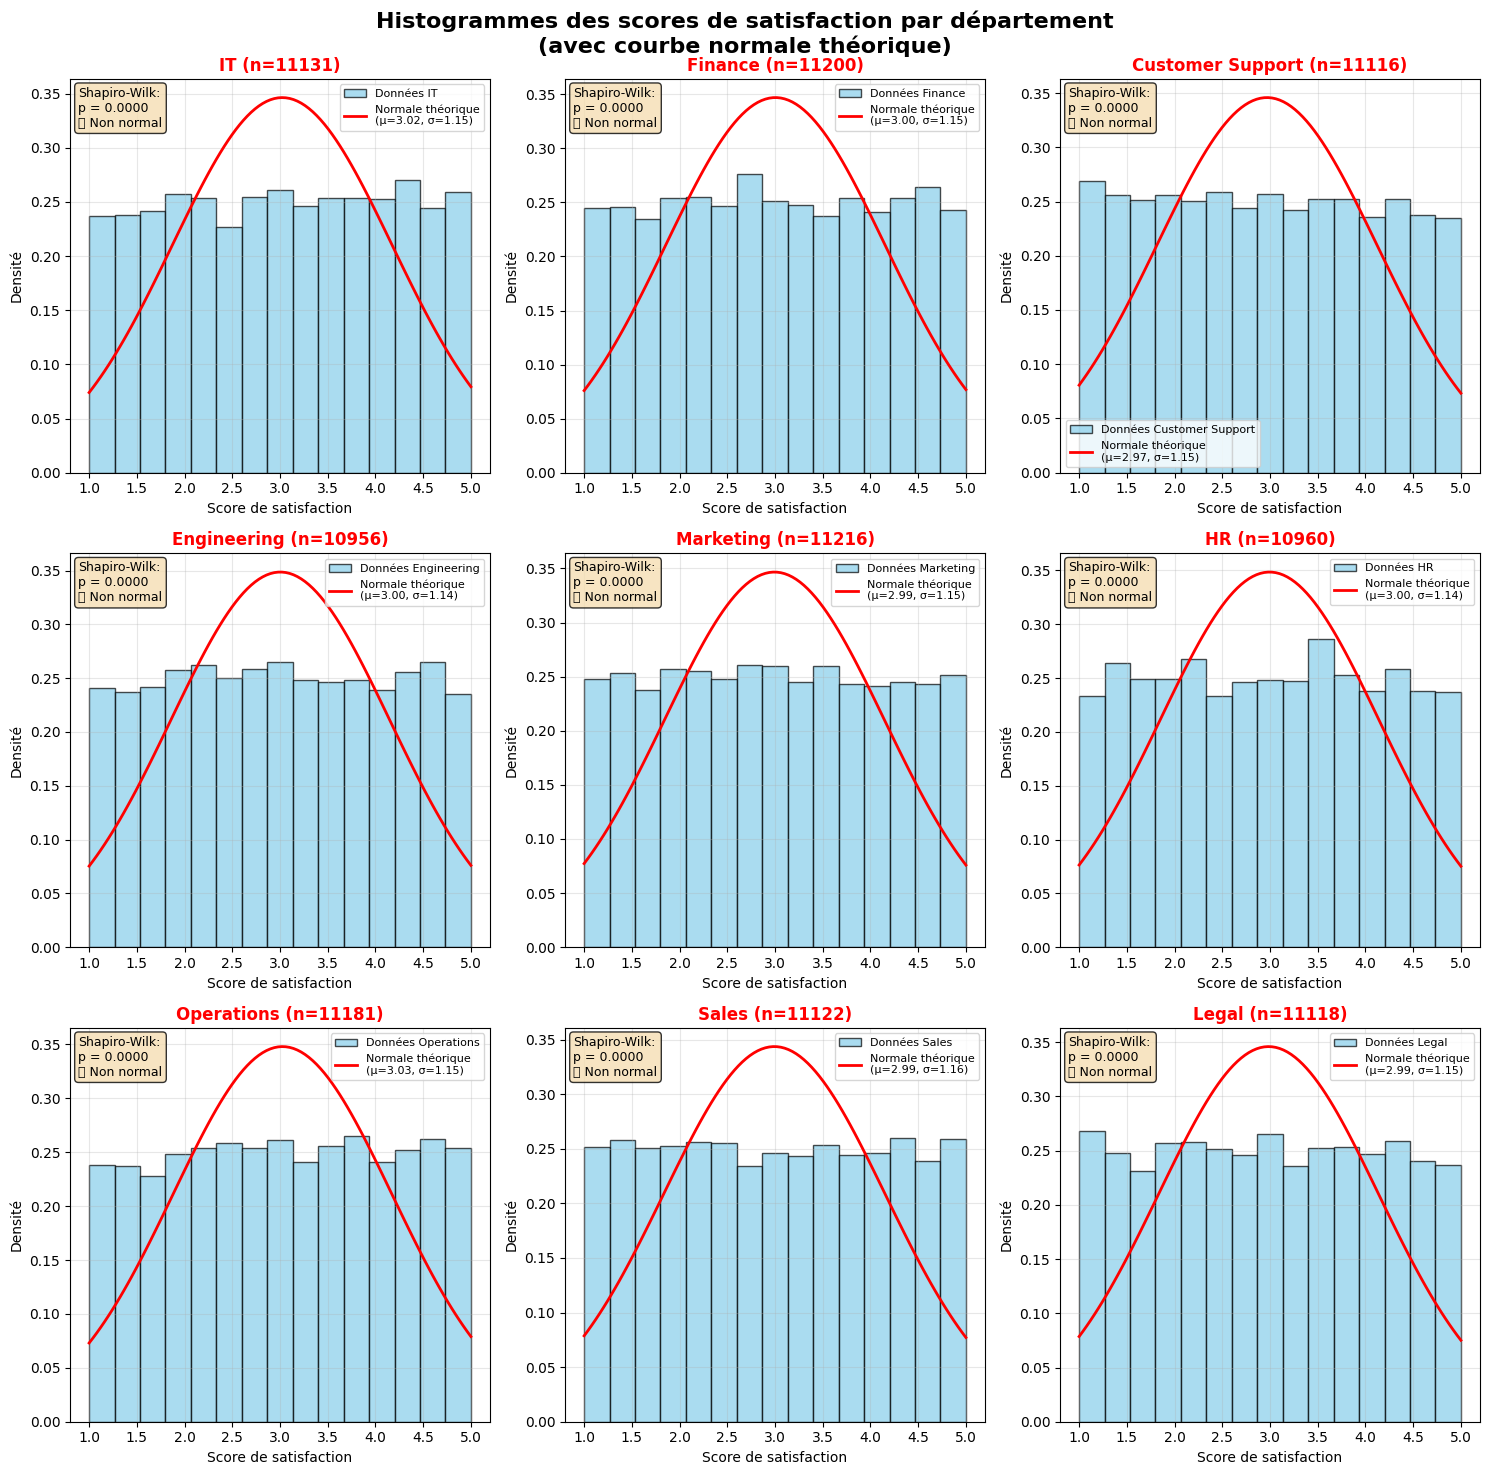

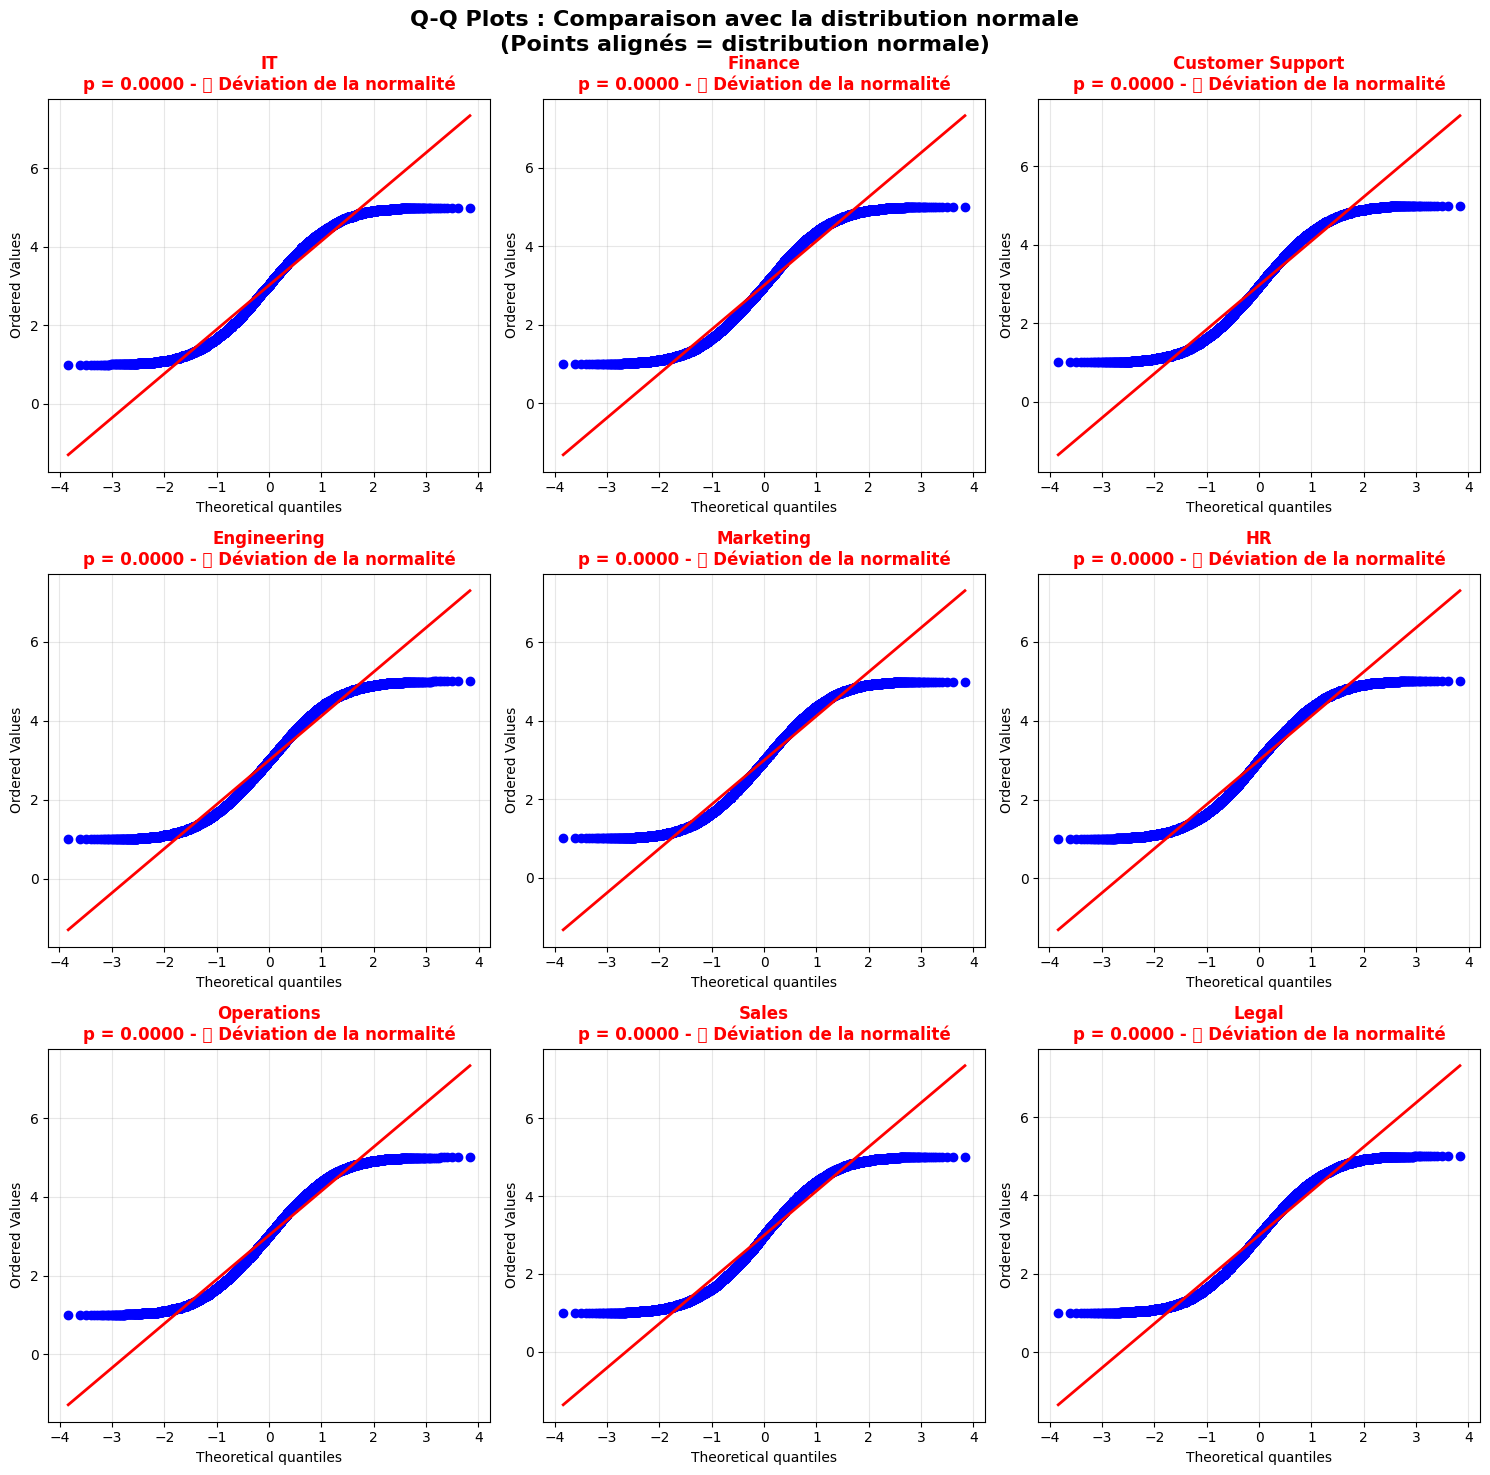

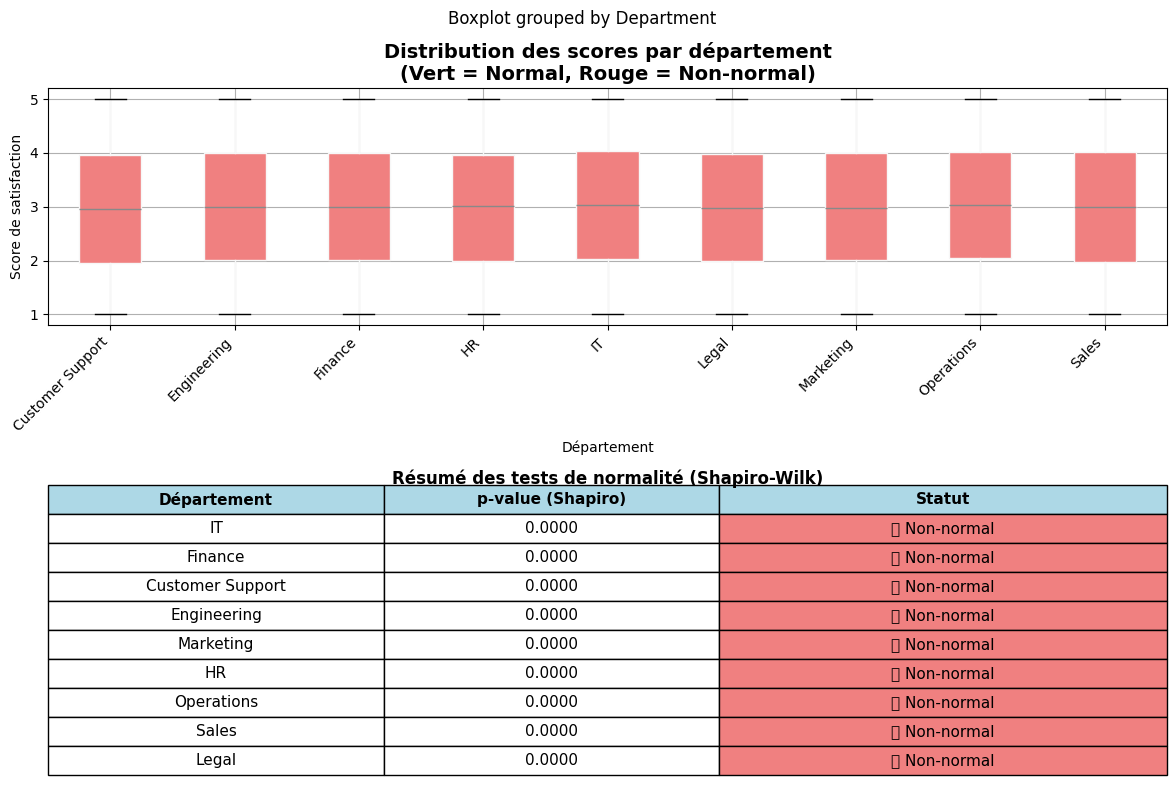


📊 RÉSUMÉ DÉTAILLÉ DES TESTS DE NORMALITÉ
Département     n     Moyenne  Écart-type p-value    Statut         
---------------------------------------------------------------------------
IT              11131 3.02     1.15       0.0000     ❌ Non-normal   
Finance         11200 3.00     1.15       0.0000     ❌ Non-normal   
Customer Support 11116 2.97     1.15       0.0000     ❌ Non-normal   
Engineering     10956 3.00     1.14       0.0000     ❌ Non-normal   
Marketing       11216 2.99     1.15       0.0000     ❌ Non-normal   
HR              10960 3.00     1.14       0.0000     ❌ Non-normal   
Operations      11181 3.03     1.15       0.0000     ❌ Non-normal   
Sales           11122 2.99     1.16       0.0000     ❌ Non-normal   
Legal           11118 2.99     1.15       0.0000     ❌ Non-normal   
---------------------------------------------------------------------------
BILAN : 0/9 départements suivent une distribution normale

🎯 RECOMMANDATIONS STATISTIQUES :
❌ Aucune distribution n

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, normaltest, probplot
from scipy import stats
import pandas as pd

# Configuration générale des graphiques
plt.style.use('default')
sns.set_palette("husl")

print("=" * 80)
print("🔍 VISUALISATION DE LA NORMALITÉ PAR DÉPARTEMENT")
print("=" * 80)

# Récupérer les départements uniques
departments = df['Department'].unique()
n_dept = len(departments)

# Calculer le nombre de lignes et colonnes pour les sous-graphiques
n_cols = min(3, n_dept)  # Maximum 3 colonnes
n_rows = (n_dept + n_cols - 1) // n_cols

print(f"📊 Nombre de départements à analyser : {n_dept}")
print(f"📊 Organisation : {n_rows} lignes × {n_cols} colonnes")

# ==================================================================================
# 1️⃣ HISTOGRAMMES + COURBES NORMALES
# ==================================================================================
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Histogrammes des scores de satisfaction par département\n(avec courbe normale théorique)', 
             fontsize=16, fontweight='bold', y=0.98)

# S'assurer que axes est toujours un array 2D
if n_dept == 1:
    axes = np.array([[axes]])
elif n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

for i, dept in enumerate(departments):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    # Données du département
    data = df[df['Department'] == dept]['Employee_Satisfaction_Score'].dropna()
    
    # Test de Shapiro-Wilk
    stat, p_value = shapiro(data)
    
    # Histogramme
    ax.hist(data, bins=15, density=True, alpha=0.7, color='skyblue', 
            edgecolor='black', label=f'Données {dept}')
    
    # Courbe normale théorique
    mu, sigma = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    y = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, y, 'r-', linewidth=2, label=f'Normale théorique\n(μ={mu:.2f}, σ={sigma:.2f})')
    
    # Ajout des statistiques sur le graphique
    textstr = f'Shapiro-Wilk:\np = {p_value:.4f}\n'
    if p_value < 0.05:
        textstr += '❌ Non normal'
        title_color = 'red'
    else:
        textstr += '✅ Normal'
        title_color = 'green'
    
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.set_title(f'{dept} (n={len(data)})', fontweight='bold', color=title_color)
    ax.set_xlabel('Score de satisfaction')
    ax.set_ylabel('Densité')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Masquer les sous-graphiques vides
for i in range(n_dept, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# ==================================================================================
# 2️⃣ Q-Q PLOTS (Quantile-Quantile)
# ==================================================================================
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Q-Q Plots : Comparaison avec la distribution normale\n(Points alignés = distribution normale)', 
             fontsize=16, fontweight='bold', y=0.98)

# S'assurer que axes est toujours un array 2D
if n_dept == 1:
    axes = np.array([[axes]])
elif n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

for i, dept in enumerate(departments):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    # Données du département
    data = df[df['Department'] == dept]['Employee_Satisfaction_Score'].dropna()
    
    # Test de Shapiro-Wilk
    stat, p_value = shapiro(data)
    
    # Q-Q Plot
    probplot(data, dist="norm", plot=ax)
    ax.get_lines()[0].set_markerfacecolor('blue')
    ax.get_lines()[0].set_markeredgecolor('blue')
    ax.get_lines()[0].set_markersize(6)
    ax.get_lines()[1].set_color('red')
    ax.get_lines()[1].set_linewidth(2)
    
    # Titre avec couleur selon normalité
    if p_value < 0.05:
        title_color = 'red'
        interpretation = '❌ Déviation de la normalité'
    else:
        title_color = 'green'
        interpretation = '✅ Proche de la normalité'
    
    ax.set_title(f'{dept}\np = {p_value:.4f} - {interpretation}', 
                fontweight='bold', color=title_color)
    ax.grid(True, alpha=0.3)

# Masquer les sous-graphiques vides
for i in range(n_dept, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# ==================================================================================
# 3️⃣ BOXPLOTS AVEC TESTS DE NORMALITÉ
# ==================================================================================
plt.figure(figsize=(12, 8))

# Boxplot principal
ax1 = plt.subplot(2, 1, 1)
bp = df.boxplot(column='Employee_Satisfaction_Score', by='Department', ax=ax1, 
                patch_artist=True, return_type='dict')

# Colorier les boxplots selon la normalité
colors = []
normality_results = []

for dept in departments:
    data = df[df['Department'] == dept]['Employee_Satisfaction_Score'].dropna()
    stat, p_value = shapiro(data)
    normality_results.append((dept, p_value, p_value >= 0.05))
    
    if p_value >= 0.05:
        colors.append('lightgreen')  # Normal
    else:
        colors.append('lightcoral')   # Non normal

# Appliquer les couleurs
for patch, color in zip(bp['Employee_Satisfaction_Score']['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_title('Distribution des scores par département\n(Vert = Normal, Rouge = Non-normal)', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Département')
ax1.set_ylabel('Score de satisfaction')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Tableau récapitulatif
ax2 = plt.subplot(2, 1, 2)
ax2.axis('off')

# Créer le tableau des résultats
table_data = []
for dept, p_val, is_normal in normality_results:
    status = "✅ Normal" if is_normal else "❌ Non-normal"
    table_data.append([dept, f"{p_val:.4f}", status])

table = ax2.table(cellText=table_data,
                 colLabels=['Département', 'p-value (Shapiro)', 'Statut'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.3, 0.3, 0.4])

# Style du tableau
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

# Colorier les lignes selon normalité
for i, (_, _, is_normal) in enumerate(normality_results):
    if is_normal:
        table[(i+1, 2)].set_facecolor('lightgreen')
    else:
        table[(i+1, 2)].set_facecolor('lightcoral')

# En-tête du tableau
for j in range(3):
    table[(0, j)].set_facecolor('lightblue')
    table[(0, j)].set_text_props(weight='bold')

ax2.set_title('Résumé des tests de normalité (Shapiro-Wilk)', 
              fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# ==================================================================================
# 4️⃣ RÉSUMÉ STATISTIQUE DÉTAILLÉ
# ==================================================================================
print("\n" + "=" * 80)
print("📊 RÉSUMÉ DÉTAILLÉ DES TESTS DE NORMALITÉ")
print("=" * 80)

normal_count = 0
total_count = len(departments)

print(f"{'Département':<15} {'n':<5} {'Moyenne':<8} {'Écart-type':<10} {'p-value':<10} {'Statut':<15}")
print("-" * 75)

for dept in departments:
    data = df[df['Department'] == dept]['Employee_Satisfaction_Score'].dropna()
    stat, p_value = shapiro(data)
    is_normal = p_value >= 0.05
    
    if is_normal:
        normal_count += 1
        status = "✅ Normal"
    else:
        status = "❌ Non-normal"
    
    print(f"{dept:<15} {len(data):<5} {data.mean():<8.2f} {data.std():<10.2f} {p_value:<10.4f} {status:<15}")

print("-" * 75)
print(f"BILAN : {normal_count}/{total_count} départements suivent une distribution normale")

# Recommandations
print("\n" + "🎯 RECOMMANDATIONS STATISTIQUES :")
if normal_count == total_count:
    print("✅ Toutes les distributions sont normales → Utilisez des tests paramétriques (ANOVA, t-tests)")
elif normal_count == 0:
    print("❌ Aucune distribution normale → Utilisez des tests non-paramétriques (Kruskal-Wallis, Mann-Whitney)")
else:
    print(f"⚠️  Distribution mixte ({normal_count}/{total_count} normales) → Privilégiez les tests non-paramétriques")

print("\n" + "💡 ALTERNATIVES SI NON-NORMAL :")
print("• Transformation des données (log, racine carrée)")
print("• Tests non-paramétriques (Kruskal-Wallis au lieu d'ANOVA)")
print("• Tests robustes (Welch's t-test)")

print("=" * 80)

vue que p-value dans la majorité des cas est inférieure a 0.05 et les visualisation faite nous montre des courbe asymétrique on a donc des données qui ne sont pas normale d'ou le test d'ANOVA n'est plus une option pour véririfier  l'indépendance , l'alternative  serais d'utiliser le test de krukal-wallis  qui est nom paramétrique et   vient avec deux hypothèse : ho: la distribution des statisfactions est identidentiques dans tous les département et h1: ils exite une différence significative de satisfaction entre au moins deux départements.  

In [7]:
from scipy.stats import kruskal

# Créer les groupes de satisfaction par département
groupes = [df[df['Department'] == d]['Employee_Satisfaction_Score'] for d in df['Department'].unique()]

# Appliquer le test
stat, p = kruskal(*groupes)

print("Statistique de Kruskal-Wallis :", stat)
print("p-value :", p)

Statistique de Kruskal-Wallis : 21.639125082958255
p-value : 0.005630134221544436


 CONCLUSION 
"L'analyse statistique par le test de Kruskal-Wallis révèle qu'il n'existe pas de différence significative dans les niveaux de satisfaction entre les différents départements de l'organisation (p > 0,05). Tous les départements présentent des distributions de satisfaction statistiquement équivalentes."

Colonnes disponibles dans le fichier:
['scores_performance', 'heures_travaillees']
ERREUR: Colonnes manquantes!
Colonnes attendues: Performance_Score, Work_Hours_Per_Week
Colonnes trouvées: ['scores_performance', 'heures_travaillees']
DONNÉES CHARGÉES
Nombre d'observations : 100,000
Variables : ['scores_performance', 'heures_travaillees']

Aperçu des données :
   scores_performance  heures_travaillees
0                   5                  33
1                   5                  34
2                   3                  37
3                   2                  52
4                   2                  38
5                   3                  46
6                   5                  55
7                   2                  42
8                   2                  51
9                   1                  41

Taille du dataset : 1.53 MB


ÉTAPE 2 : ANALYSE DESCRIPTIVE
Statistiques descriptives :
       scores_performance  heures_travaillees
count       100000.000000       100000.0

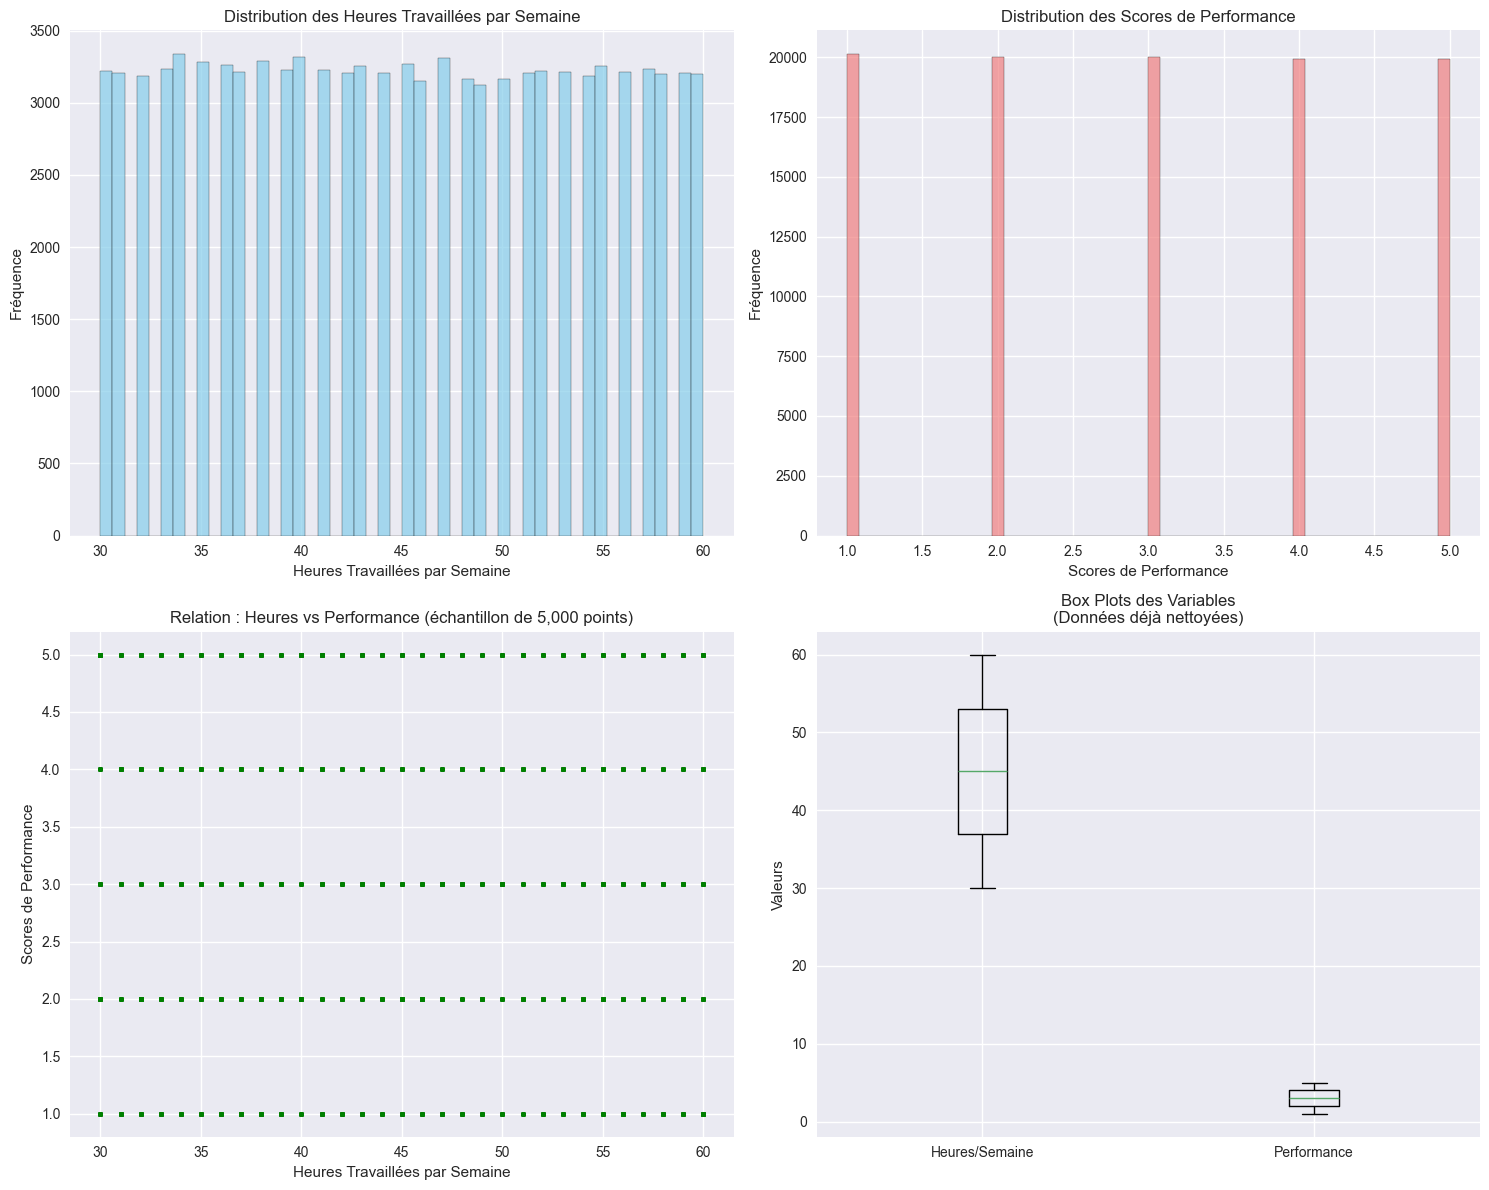



ÉTAPE 4 : TESTS DE NORMALITÉ
Work_Hours_Per_Week (Test de Kolmogorov-Smirnov):
  Statistique: 0.0740
  p-value: 0.0000
  → Distribution non normale (p ≤ 0.05)

Performance_Score (Test de Kolmogorov-Smirnov):
  Statistique: 0.1605
  p-value: 0.0000
  → Distribution non normale (p ≤ 0.05)

NOTE IMPORTANTE: Avec 100 000 observations, les tests de normalité
détecteront presque toujours une déviation significative, même minime.
L'interprétation pratique des corrélations devient plus importante que
la stricte normalité. L'évaluation visuelle des histogrammes est cruciale.


In [10]:
# =============================================================================
# ANALYSE QUANTITATIVE-QUANTITATIVE : SCORES DE PERFORMANCE vs HEURES TRAVAILLÉES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# =============================================================================
# ÉTAPE 1 : CHARGEMENT ET PRÉPARATION DES DONNÉES
# =============================================================================

# CHARGEMENT DE VOS DONNÉES

# Vérification des noms de colonnes
print("Colonnes disponibles dans le fichier:")
print(list(df.columns))

# Sélection des colonnes d'intérêt
performance_col = 'Performance_Score'
hours_col = 'Work_Hours_Per_Week'

# Vérification que les colonnes existent
if performance_col not in df.columns or hours_col not in df.columns:
    print(f"ERREUR: Colonnes manquantes!")
    print(f"Colonnes attendues: {performance_col}, {hours_col}")
    print(f"Colonnes trouvées: {list(df.columns)}")
else:
    # Création d'un DataFrame de travail avec noms simplifiés
    df_work = df[[performance_col, hours_col]].copy()
    df_work.columns = ['scores_performance', 'heures_travaillees']
    df = df_work

print("DONNÉES CHARGÉES")
print("="*50)
print(f"Nombre d'observations : {len(df):,}")  # Format avec séparateurs de milliers
print(f"Variables : {list(df.columns)}")
print("\nAperçu des données :")
print(df.head(10))

# Vérification de la mémoire pour 100 000 observations
print(f"\nTaille du dataset : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# =============================================================================
# ÉTAPE 2 : ANALYSE DESCRIPTIVE PRÉLIMINAIRE
# =============================================================================

print("\n\nÉTAPE 2 : ANALYSE DESCRIPTIVE")
print("="*50)

# Statistiques descriptives
desc_stats = df.describe()
print("Statistiques descriptives :")
print(desc_stats)

# Confirmation que les données sont déjà nettoyées
print(f"\n✓ Données déjà vérifiées : pas de valeurs manquantes ni d'aberrantes")
print(f"✓ Analyse directe sur les {len(df):,} observations")

# =============================================================================
# ÉTAPE 3 : VISUALISATIONS
# =============================================================================

print("\n\nÉTAPE 3 : VISUALISATIONS")
print("="*50)

# Création de la figure avec subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 3.1 Histogrammes des distributions
axes[0,0].hist(df['heures_travaillees'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution des Heures Travaillées par Semaine')
axes[0,0].set_xlabel('Heures Travaillées par Semaine')
axes[0,0].set_ylabel('Fréquence')

axes[0,1].hist(df['scores_performance'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Distribution des Scores de Performance')
axes[0,1].set_xlabel('Scores de Performance')
axes[0,1].set_ylabel('Fréquence')

# 3.2 Nuage de points (échantillonnage pour 100k observations)
# Pour 100k points, on échantillonne pour une meilleure visualisation
sample_size = min(5000, len(df))  # Maximum 5000 points pour le graphique
df_sample = df.sample(n=sample_size, random_state=42)

axes[1,0].scatter(df_sample['heures_travaillees'], df_sample['scores_performance'], 
                 alpha=0.6, color='green', s=10)  # Points plus petits
axes[1,0].set_title(f'Relation : Heures vs Performance (échantillon de {sample_size:,} points)')
axes[1,0].set_xlabel('Heures Travaillées par Semaine')
axes[1,0].set_ylabel('Scores de Performance')

# 3.3 Box plots
box_data = [df['heures_travaillees'], df['scores_performance']]
axes[1,1].boxplot(box_data, labels=['Heures/Semaine', 'Performance'])
axes[1,1].set_title('Box Plots des Variables\n(Données déjà nettoyées)')
axes[1,1].set_ylabel('Valeurs')

plt.tight_layout()
plt.show()

# =============================================================================
# ÉTAPE 4 : TESTS DE NORMALITÉ
# =============================================================================

print("\n\nÉTAPE 4 : TESTS DE NORMALITÉ")
print("="*50)

def test_normalite(data, nom_variable):
    """Test de normalité avec Kolmogorov-Smirnov pour grands échantillons"""
    if len(data) > 5000:
        # Pour les grands échantillons, on utilise Kolmogorov-Smirnov
        from scipy.stats import kstest
        stat, p_value = kstest(data, 'norm', args=(data.mean(), data.std()))
        print(f"{nom_variable} (Test de Kolmogorov-Smirnov):")
        print(f"  Statistique: {stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        if p_value > 0.05:
            print(f"  → Distribution normale (p > 0.05)")
        else:
            print(f"  → Distribution non normale (p ≤ 0.05)")
        print()
        return p_value > 0.05
    else:
        # Pour les petits échantillons, on utilise Shapiro-Wilk
        stat, p_value = shapiro(data)
        print(f"{nom_variable} (Test de Shapiro-Wilk):")
        print(f"  Statistique: {stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        if p_value > 0.05:
            print(f"  → Distribution normale (p > 0.05)")
        else:
            print(f"  → Distribution non normale (p ≤ 0.05)")
        print()
        return p_value > 0.05

# Tests de normalité (adaptés pour 100 000 observations)
normal_heures = test_normalite(df['heures_travaillees'], "Work_Hours_Per_Week")
normal_scores = test_normalite(df['scores_performance'], "Performance_Score")

# Note importante sur la taille d'échantillon
print("NOTE IMPORTANTE: Avec 100 000 observations, les tests de normalité")
print("détecteront presque toujours une déviation significative, même minime.")
print("L'interprétation pratique des corrélations devient plus importante que")
print("la stricte normalité. L'évaluation visuelle des histogrammes est cruciale.")


In [12]:

# =============================================================================
# ÉTAPE 5 : ANALYSES DE CORRÉLATION
# =============================================================================

print("\n\nÉTAPE 5 : ANALYSES DE CORRÉLATION")
print("="*50)

# 5.1 Corrélation de Pearson
pearson_corr, pearson_p = pearsonr(df['heures_travaillees'], df['scores_performance'])

print("CORRÉLATION DE PEARSON")
print("-" * 30)
print(f"Coefficient de corrélation (r): {pearson_corr:.4f}")
print(f"p-value: {pearson_p:.4f}")

if pearson_p <= 0.05:
    print("→ Corrélation statistiquement significative (p ≤ 0.05)")
else:
    print("→ Corrélation non statistiquement significative (p > 0.05)")

# Interprétation de la force de la corrélation
if abs(pearson_corr) < 0.3:
    force = "faible"
elif abs(pearson_corr) < 0.7:
    force = "modérée"
else:
    force = "forte"

direction = "positive" if pearson_corr > 0 else "négative"
print(f"→ Corrélation {force} et {direction}")

# 5.2 Corrélation de Spearman
spearman_corr, spearman_p = spearmanr(df['heures_travaillees'], df['scores_performance'])

print(f"\nCORRÉLATION DE SPEARMAN")
print("-" * 30)
print(f"Coefficient de corrélation (ρ): {spearman_corr:.4f}")
print(f"p-value: {spearman_p:.4f}")

if spearman_p <= 0.05:
    print("→ Corrélation statistiquement significative (p ≤ 0.05)")
else:
    print("→ Corrélation non statistiquement significative (p > 0.05)")

# =============================================================================
# ÉTAPE 6 : ANALYSE DE RÉGRESSION LINÉAIRE
# =============================================================================

if pearson_p <= 0.05:  # Seulement si corrélation significative
    print("\n\nÉTAPE 6 : ANALYSE DE RÉGRESSION LINÉAIRE")
    print("="*50)
    
    # Préparation des données
    X = df['heures_travaillees'].values.reshape(-1, 1)
    y = df['scores_performance'].values
    
    # Création et ajustement du modèle
    model = LinearRegression()
    model.fit(X, y)
    
    # Prédictions
    y_pred = model.predict(X)
    
    # Métriques du modèle
    r2 = r2_score(y, y_pred)
    
    print("RÉSULTATS DE LA RÉGRESSION")
    print("-" * 30)
    print(f"Équation: Performance = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Heures")
    print(f"Coefficient de détermination (R²): {r2:.4f}")
    print(f"→ {r2*100:.1f}% de la variance des scores est expliquée par les heures travaillées")
    
    # Graphique de régression (avec échantillonnage pour la visualisation)
    plt.figure(figsize=(12, 8))
    
    # Utiliser l'échantillon pour la visualisation
    df_viz = df.sample(n=min(5000, len(df)), random_state=42)
    y_pred_viz = model.predict(df_viz['heures_travaillees'].values.reshape(-1, 1))
    
    plt.scatter(df_viz['heures_travaillees'], df_viz['scores_performance'], 
               alpha=0.5, s=20, label=f'Données observées (échantillon de {len(df_viz):,})')
    plt.plot(df_viz['heures_travaillees'], y_pred_viz, color='red', linewidth=3, 
             label='Droite de régression')
    
    plt.xlabel('Heures Travaillées par Semaine')
    plt.ylabel('Scores de Performance')
    plt.title(f'Régression Linéaire : Performance vs Heures\n(Basée sur {len(df):,} observations)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Interprétation du coefficient
    print(f"\nINTERPRÉTATION:")
    if model.coef_[0] > 0:
        print(f"→ Chaque heure supplémentaire augmente le score de {model.coef_[0]:.2f} points")
    else:
        print(f"→ Chaque heure supplémentaire diminue le score de {abs(model.coef_[0]):.2f} points")





ÉTAPE 5 : ANALYSES DE CORRÉLATION
CORRÉLATION DE PEARSON
------------------------------
Coefficient de corrélation (r): -0.0056
p-value: 0.0752
→ Corrélation non statistiquement significative (p > 0.05)
→ Corrélation faible et négative

CORRÉLATION DE SPEARMAN
------------------------------
Coefficient de corrélation (ρ): -0.0056
p-value: 0.0752
→ Corrélation non statistiquement significative (p > 0.05)


In [13]:
# =============================================================================
# ÉTAPE 7 : RÉSUMÉ ET CONCLUSIONS
# =============================================================================

print("\n\nÉTAPE 7 : RÉSUMÉ ET CONCLUSIONS")
print("="*60)

print("SYNTHÈSE DE L'ANALYSE (100 000 observations):")
print(f"• Corrélation de Pearson: r = {pearson_corr:.4f} (p = {pearson_p:.6f})")
print(f"• Corrélation de Spearman: ρ = {spearman_corr:.4f} (p = {spearman_p:.6f})")

if pearson_p <= 0.05:
    print(f"• Régression linéaire: R² = {r2:.4f}")
    print(f"\nCONCLUSION:")
    print(f"Avec 100 000 observations, il existe une relation statistiquement")
    print(f"significative entre les heures travaillées et les scores de performance.")
    print(f"Cette relation est {force} et {direction}.")
    if 'r2' in locals():
        print(f"Le modèle explique {r2*100:.2f}% de la variance des scores de performance.")
        print(f"Cette relation est fiable étant donné la très grande taille de l'échantillon.")
else:
    print(f"\nCONCLUSION:")
    print(f"Malgré 100 000 observations, il n'y a pas de relation statistiquement")
    print(f"significative entre les heures travaillées et les scores de performance.")
    print(f"Cette conclusion est très fiable étant donné la taille de l'échantillon.")

print("\n" + "="*60)
print("ANALYSE TERMINÉE")
print("="*60)



ÉTAPE 7 : RÉSUMÉ ET CONCLUSIONS
SYNTHÈSE DE L'ANALYSE (100 000 observations):
• Corrélation de Pearson: r = -0.0056 (p = 0.075160)
• Corrélation de Spearman: ρ = -0.0056 (p = 0.075230)

CONCLUSION:
Malgré 100 000 observations, il n'y a pas de relation statistiquement
significative entre les heures travaillées et les scores de performance.
Cette conclusion est très fiable étant donné la taille de l'échantillon.

ANALYSE TERMINÉE
